In [1]:
! pip install openml

In [2]:
import openml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

%config InlineBackend.figure_format = 'svg'

sns.set(style="darkgrid")

In [45]:
import warnings
warnings.filterwarnings("ignore")

## Анализ датасета ilpd:

In [3]:
df_ilpd = openml.datasets.get_dataset(1480)
X_ilpd, y_ilpd, _, _ = df_ilpd.get_data(target=df_ilpd.default_target_attribute)

In [4]:
X_ilpd.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,65,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90
1,62,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74
2,62,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89
3,58,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00
4,72,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40
5,46,Male,1.8,0.7,208.0,19.0,14.0,7.6,4.4,1.30
6,26,Female,0.9,0.2,154.0,16.0,12.0,7.0,3.5,1.00
7,29,Female,0.9,0.3,202.0,14.0,11.0,6.7,3.6,1.10
8,17,Male,0.9,0.3,202.0,22.0,19.0,7.4,4.1,1.20
9,55,Male,0.7,0.2,290.0,53.0,58.0,6.8,3.4,1.00


In [5]:
y_ilpd.value_counts()

Class
1    416
2    167
Name: count, dtype: int64

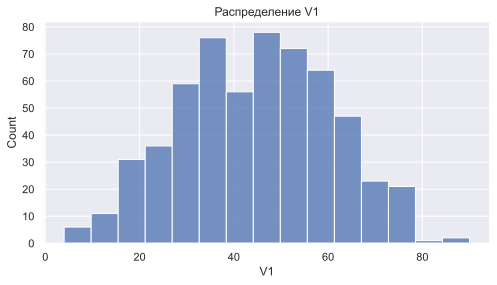

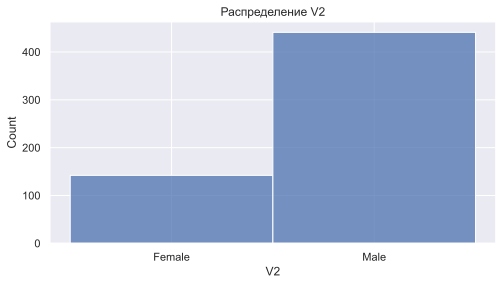

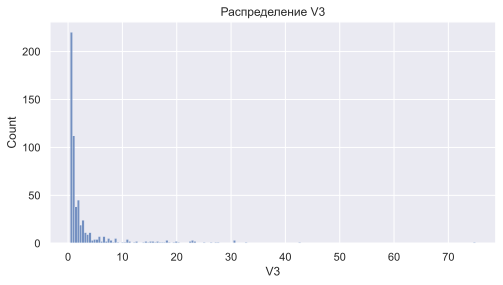

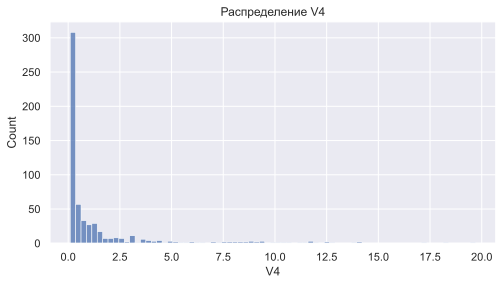

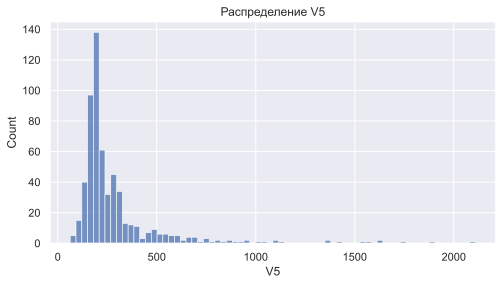

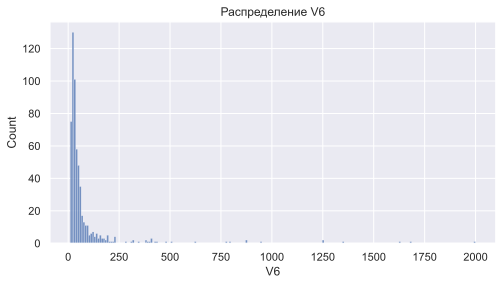

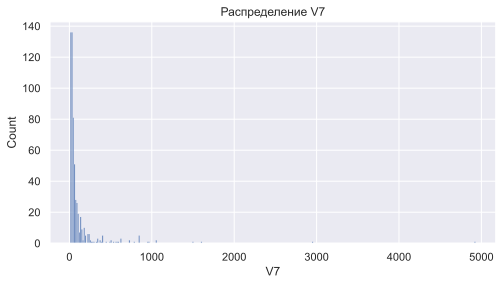

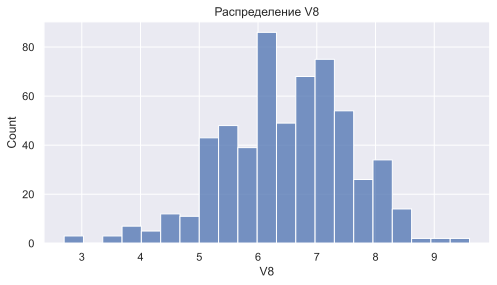

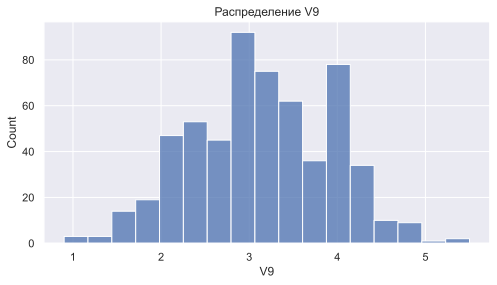

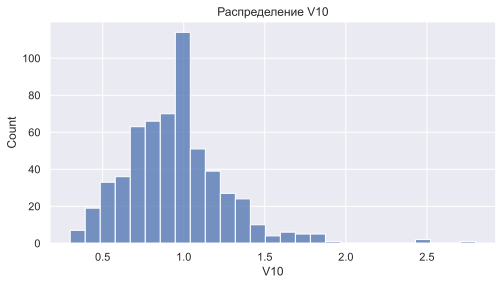

In [6]:
for column in X_ilpd.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(X_ilpd[column])
    plt.title(f'Распределение {column}')
    plt.show()

In [7]:
print(X_ilpd.dtypes)

V1        uint8
V2     category
V3      float64
V4      float64
V5      float64
V6      float64
V7      float64
V8      float64
V9      float64
V10     float64
dtype: object


Как видно из графиков - V2 категориальный признак, остальные - численные.

## Анализ датасета bank:

In [8]:
df_bank = openml.datasets.get_dataset(31)
X_bank, y_bank, _, _ = df_bank.get_data(target=df_bank.default_target_attribute)

In [9]:
X_bank.head(10)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,<0,6,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4,male single,none,4,real estate,67,none,own,2,skilled,1,yes,yes
1,0<=X<200,48,existing paid,radio/tv,5951.0,<100,1<=X<4,2,female div/dep/mar,none,2,real estate,22,none,own,1,skilled,1,none,yes
2,no checking,12,critical/other existing credit,education,2096.0,<100,4<=X<7,2,male single,none,3,real estate,49,none,own,1,unskilled resident,2,none,yes
3,<0,42,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2,male single,guarantor,4,life insurance,45,none,for free,1,skilled,2,none,yes
4,<0,24,delayed previously,new car,4870.0,<100,1<=X<4,3,male single,none,4,no known property,53,none,for free,2,skilled,2,none,yes
5,no checking,36,existing paid,education,9055.0,no known savings,1<=X<4,2,male single,none,4,no known property,35,none,for free,1,unskilled resident,2,yes,yes
6,no checking,24,existing paid,furniture/equipment,2835.0,500<=X<1000,>=7,3,male single,none,4,life insurance,53,none,own,1,skilled,1,none,yes
7,0<=X<200,36,existing paid,used car,6948.0,<100,1<=X<4,2,male single,none,2,car,35,none,rent,1,high qualif/self emp/mgmt,1,yes,yes
8,no checking,12,existing paid,radio/tv,3059.0,>=1000,4<=X<7,2,male div/sep,none,4,real estate,61,none,own,1,unskilled resident,1,none,yes
9,0<=X<200,30,critical/other existing credit,new car,5234.0,<100,unemployed,4,male mar/wid,none,2,car,28,none,own,2,high qualif/self emp/mgmt,1,none,yes


In [10]:
y_bank.replace(to_replace=['good', 'bad'], value=['1', '2'], inplace=True)
y_bank.value_counts()

class
1    700
2    300
Name: count, dtype: int64

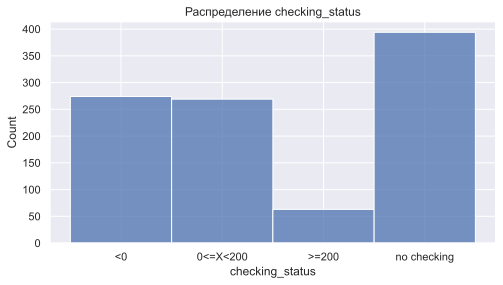

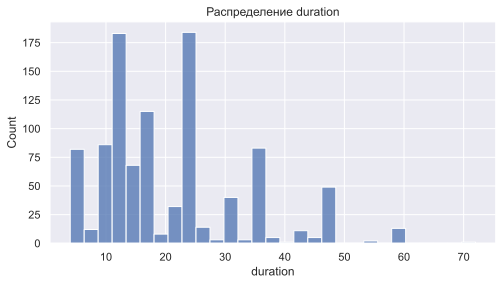

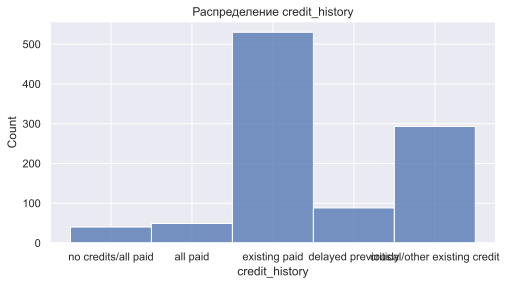

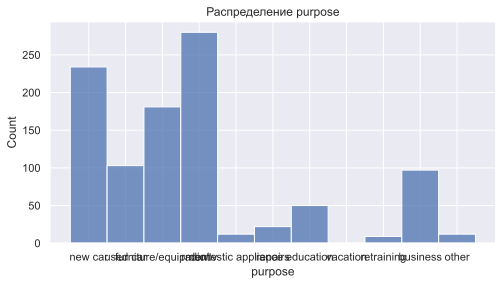

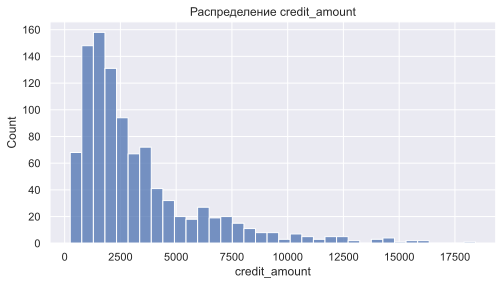

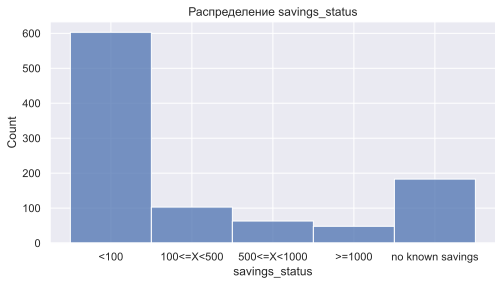

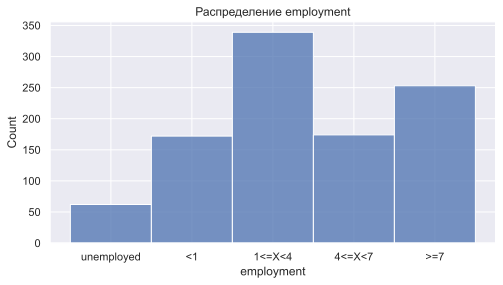

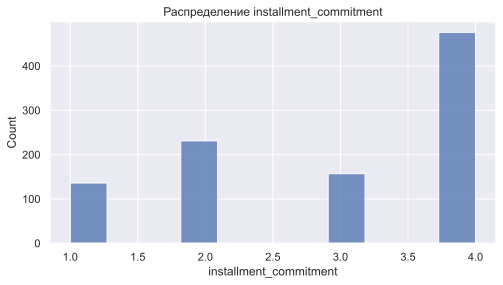

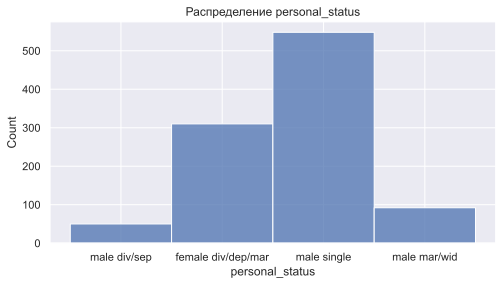

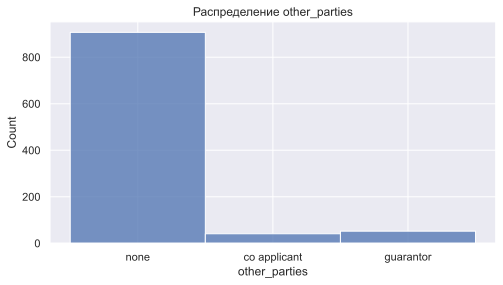

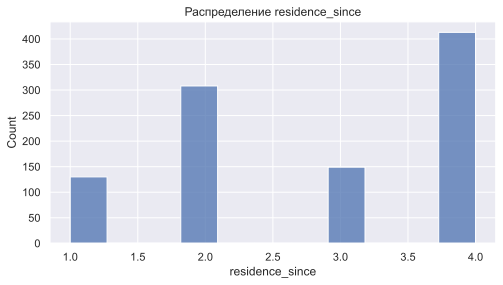

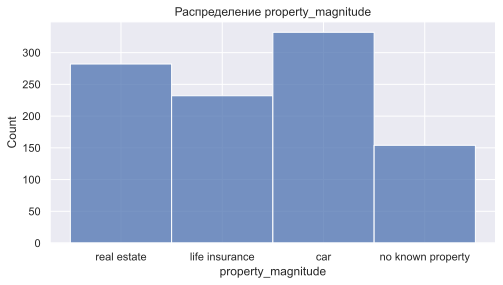

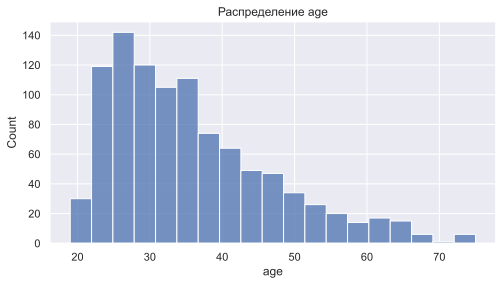

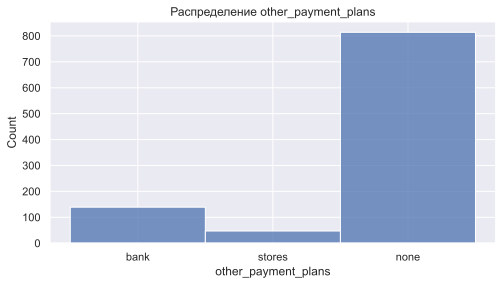

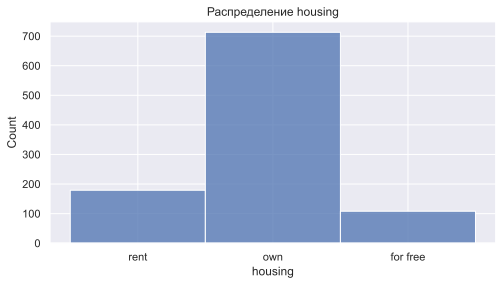

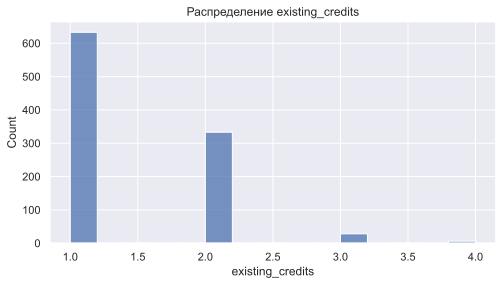

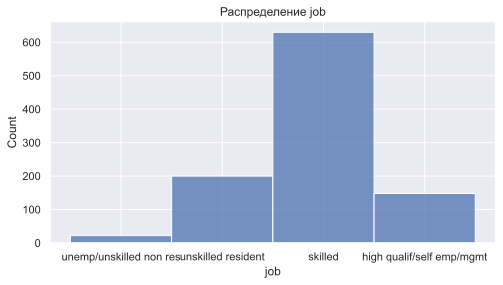

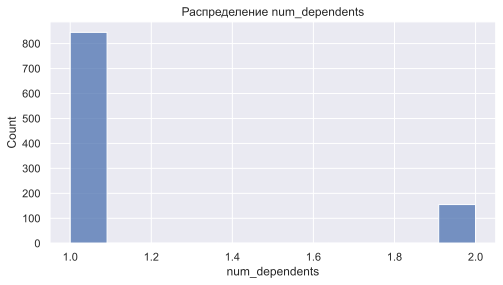

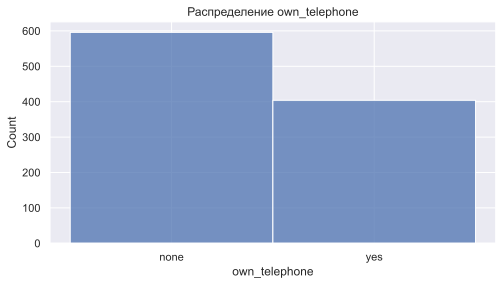

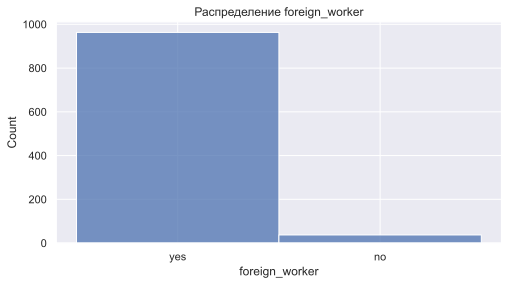

In [11]:
for column in X_bank.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(X_bank[column])
    plt.title(f'Распределение {column}')
    if (column == 'V2'):
      plt.xticks(rotation=45)
    plt.show()

In [12]:
print(X_bank.dtypes)

checking_status           category
duration                     uint8
credit_history            category
purpose                   category
credit_amount              float64
savings_status            category
employment                category
installment_commitment       uint8
personal_status           category
other_parties             category
residence_since              uint8
property_magnitude        category
age                          uint8
other_payment_plans       category
housing                   category
existing_credits             uint8
job                       category
num_dependents               uint8
own_telephone             category
foreign_worker            category
dtype: object


## Анализ датасета tic-tac-toe:

In [13]:
df_tic = openml.datasets.get_dataset(50)
X_tic, y_tic, _, _ = df_tic.get_data(target=df_tic.default_target_attribute)

In [14]:
X_tic.head(10)

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square
0,x,x,x,x,o,o,x,o,o
1,x,x,x,x,o,o,o,x,o
2,x,x,x,x,o,o,o,o,x
3,x,x,x,x,o,o,o,b,b
4,x,x,x,x,o,o,b,o,b
5,x,x,x,x,o,o,b,b,o
6,x,x,x,x,o,b,o,o,b
7,x,x,x,x,o,b,o,b,o
8,x,x,x,x,o,b,b,o,o
9,x,x,x,x,b,o,o,o,b


In [15]:
y_tic.replace(to_replace=['positive', 'negative'], value=['1', '2'], inplace=True)
y_tic.value_counts()

Class
1    626
2    332
Name: count, dtype: int64

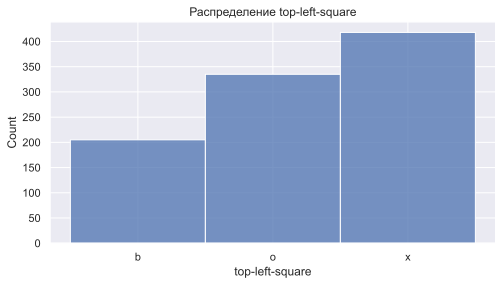

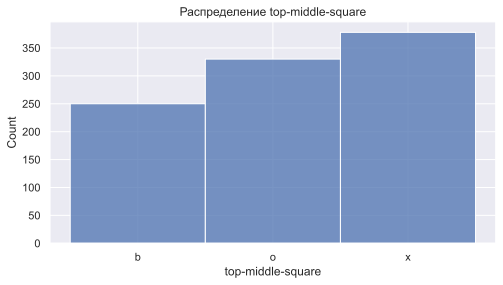

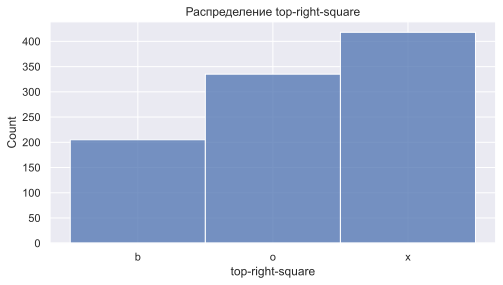

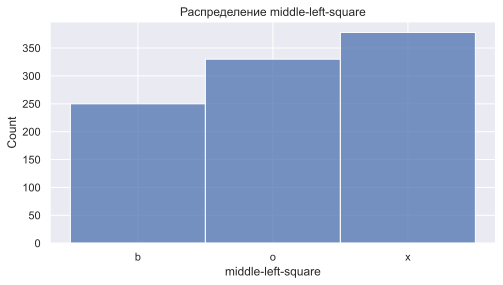

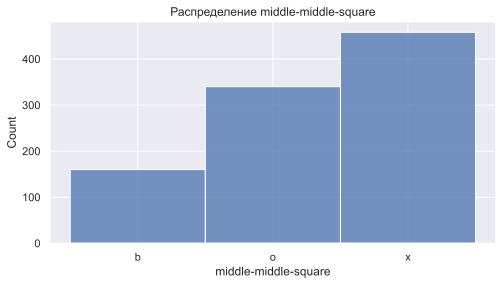

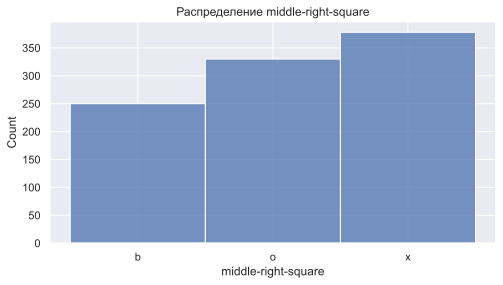

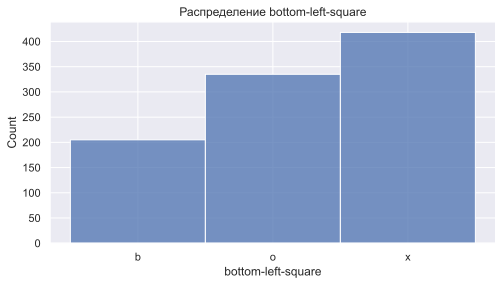

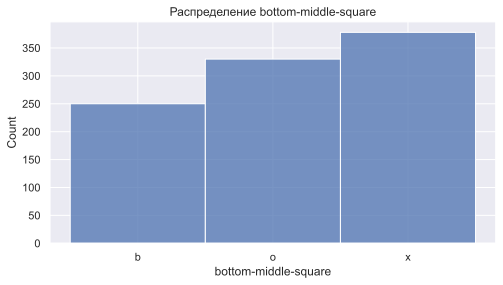

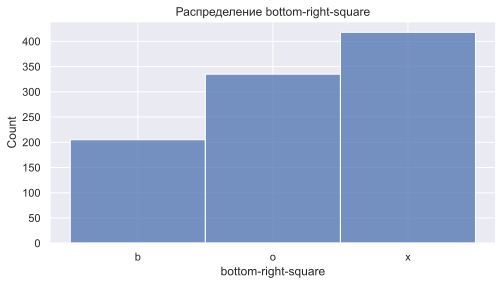

In [16]:
for column in X_tic.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(X_tic[column])
    plt.title(f'Распределение {column}')
    plt.show()

In [17]:
print(X_tic.dtypes)

top-left-square         category
top-middle-square       category
top-right-square        category
middle-left-square      category
middle-middle-square    category
middle-right-square     category
bottom-left-square      category
bottom-middle-square    category
bottom-right-square     category
dtype: object


Как можно заметить из графиков - все признаки категориальные.

## Анализ датасета australian:

In [18]:
df_austr = openml.datasets.get_dataset(40981)
X_austr, y_austr, _, _ = df_austr.get_data(target=df_austr.default_target_attribute)

In [19]:
X_austr.head(10)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14
0,1,65.0,168,2,4,4,39,0,0,1,1,2,32,161
1,0,72.0,123,2,8,4,5,0,0,1,0,2,53,1
2,0,142.0,52,1,4,4,31,0,0,1,1,2,98,1
3,0,60.0,169,1,5,3,1,1,1,12,1,2,1,1
4,1,44.0,134,2,6,4,46,1,1,15,0,2,18,68
5,0,4.0,20,2,8,8,37,1,1,3,0,2,32,1
6,1,16.0,119,2,3,4,4,0,0,1,0,2,18,50
7,0,330.0,94,2,11,8,66,1,1,7,0,2,12,120
8,1,126.0,33,1,2,8,65,0,0,1,0,2,61,117
9,0,315.0,125,2,4,8,100,1,1,4,1,2,32,36


In [20]:
y_austr.replace(to_replace=['0', '1'], value=['1', '2'], inplace=True)
y_austr.value_counts()

A15
1    383
2    307
Name: count, dtype: int64

In [21]:
print(X_austr.dtypes)

A1     category
A2      float64
A3        uint8
A4     category
A5     category
A6     category
A7        uint8
A8     category
A9     category
A10       uint8
A11    category
A12    category
A13       uint8
A14       uint8
dtype: object


In [22]:
! pip install lightgbm

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, make_scorer

f1_scorer = make_scorer(f1_score, pos_label='1')

In [24]:
n_estimators = [100, 300, 500, 700]
max_depth = [None, 10, 20, 20]
min_samples_leaf = [1, 2, 6, 10]

In [25]:
c = [0.001, 0.1, 1, 10]
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
shrinking = [True, False]

In [26]:
learning_rate = [0.001, 0.01, 0.3]
num_leaves = [30, 50, 100, 200]
reg_lambda = [0, 0.1, 0.5, 1.0]

In [27]:
RandomForest_params = {
    'model__n_estimators': n_estimators,
    'model__max_depth': max_depth,
    'model__min_samples_leaf': min_samples_leaf
}

SVC_params = {
    'model__C': c,
    'model__shrinking': shrinking,
    'model__kernel': kernel
}

LGBM_params = {
    'model__n_estimators': n_estimators,
    'model__learning_rate': learning_rate,
    'model__num_leaves': num_leaves,
    'model__reg_lambda': reg_lambda
}

In [28]:
print(RandomForest_params)
print(SVC_params)
print(LGBM_params)

{'model__n_estimators': [100, 300, 500, 700], 'model__max_depth': [None, 10, 20, 20], 'model__min_samples_leaf': [1, 2, 6, 10]}
{'model__C': [0.001, 0.1, 1, 10], 'model__shrinking': [True, False], 'model__kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
{'model__n_estimators': [100, 300, 500, 700], 'model__learning_rate': [0.001, 0.01, 0.3], 'model__num_leaves': [30, 50, 100, 200], 'model__reg_lambda': [0, 0.1, 0.5, 1.0]}


In [29]:
categorical_ilpd = ['V2']
categorical_tic = list(X_tic.columns)
categorical_bank = ['checking_status', 
                    'credit_history',
                    'purpose',
                    'savings_status',
                    'employment',
                    'personal_status',
                    'other_parties',
                    'property_magnitude',
                    'other_payment_plans',
                    'housing',
                    'job',
                    'own_telephone',
                    'foreign_worker'
]

categorical_austr = ['A1',
                    'A4',     
                    'A5',
                    'A6',
                    'A8',
                    'A9',
                    'A11',
                    'A12'
                   ]

numeric_features_ilpd = list(set(X_ilpd.columns) - set(categorical_ilpd))
numeric_features_tic = list(set(X_tic.columns) - set(categorical_tic))
numeric_features_bank = list(set(X_bank.columns) - set(categorical_bank))
numeric_features_austr = list(set(X_austr.columns) - set(categorical_austr))

column_transformer_ilpd = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_ilpd),
    ('scaling', StandardScaler(), numeric_features_ilpd)
])

column_transformer_bank = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_bank),
    ('scaling', StandardScaler(), numeric_features_bank)
])

column_transformer_tic = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_tic),
    ('scaling', StandardScaler(), numeric_features_tic)
])

column_transformer_austr = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_austr),
    ('scaling', StandardScaler(), numeric_features_austr)
])

In [65]:
pipeline_ilpd_rf = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer_ilpd),
    ('model', RandomForestClassifier())
])

pipeline_tic_rf = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer_tic),
    ('model', RandomForestClassifier())
])

pipeline_bank_rf = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer_bank),
    ('model', RandomForestClassifier())
])

pipeline_austr_rf = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer_austr),
    ('model', RandomForestClassifier())
])

pipeline_ilpd_svc = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer_ilpd),
    ('model', SVC())
])

pipeline_tic_svc = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer_tic),
    ('model', SVC())
])

pipeline_bank_svc = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer_bank),
    ('model', SVC())
])

pipeline_austr_svc = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer_austr),
    ('model', SVC())
])

pipeline_ilpd_lg = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer_ilpd),
    ('model', LGBMClassifier(is_unbalance=True, verbose=-1))
])

pipeline_tic_lg = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer_tic),
    ('model', LGBMClassifier(is_unbalance=True, verbose=-1))
])

pipeline_bank_lg = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer_bank),
    ('model', LGBMClassifier(is_unbalance=True, verbose=-1))
])

pipeline_austr_lg = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer_austr),
    ('model', LGBMClassifier(is_unbalance=True, verbose=-1))
])

In [31]:
models = pd.DataFrame({'dataset':['ilpd', 'ilpd', 'ilpd', 'bank', 'bank', 'bank', 'tic', 'tic', 'tic', 'austr', 'austr', 'austr'],
                       'model':['rf', 'svc', 'lg', 'rf', 'svc', 'lg', 'rf', 'svc', 'lg', 'rf', 'svc', 'lg'],
                       'pipeline':[pipeline_ilpd_rf, pipeline_ilpd_svc, pipeline_ilpd_lg, pipeline_bank_rf, pipeline_bank_svc, pipeline_bank_lg,
                                   pipeline_tic_rf, pipeline_tic_svc, pipeline_tic_lg, pipeline_austr_rf, pipeline_austr_svc, pipeline_bank_lg]})

In [32]:
X_ilpd_train, X_ilpd_test, y_ilpd_train, y_ilpd_test = train_test_split(X_ilpd, y_ilpd, test_size=0.2, random_state=10)
X_bank_train, X_bank_test, y_bank_train, y_bank_test = train_test_split(X_bank, y_bank, test_size=0.2, random_state=10)
X_tic_train, X_tic_test, y_tic_train, y_tic_test = train_test_split(X_tic, y_tic, test_size=0.2, random_state=10)
X_austr_train, X_austr_test, y_austr_train, y_austr_test = train_test_split(X_austr, y_austr, test_size=0.2, random_state=10)

In [33]:
df = pd.DataFrame({'search_model':[], 'dataset':[], 'model':[], 'metric':[], 'params':[]})

In [34]:
# RandomForest для ilpd
search_ilpd_rf = GridSearchCV(pipeline_ilpd_rf, RandomForest_params, scoring=f1_scorer, n_jobs=-1)
for i in range(10):
    search_ilpd_rf.fit(X_ilpd_train, y_ilpd_train)
    result_ilpd_rf = search_ilpd_rf.best_estimator_
    params_ilpd_rf = search_ilpd_rf.best_params_
    print(params_ilpd_rf)
    pred_ilpd_rf = result_ilpd_rf.predict(X_ilpd_test)
    metric_ilpd_rf = f1_score(y_ilpd_test, pred_ilpd_rf, pos_label='1')
    print(metric_ilpd_rf)
    df.loc[len(df.index)] = ['rf', 'ilpd', 'grid', metric_ilpd_rf, params_ilpd_rf]

{'model__max_depth': None, 'model__min_samples_leaf': 10, 'model__n_estimators': 500}
0.8191489361702127
{'model__max_depth': 10, 'model__min_samples_leaf': 10, 'model__n_estimators': 100}
0.8191489361702127
{'model__max_depth': 20, 'model__min_samples_leaf': 1, 'model__n_estimators': 100}
0.7796610169491526
{'model__max_depth': 20, 'model__min_samples_leaf': 1, 'model__n_estimators': 100}
0.797752808988764
{'model__max_depth': 20, 'model__min_samples_leaf': 10, 'model__n_estimators': 300}
0.8297872340425532
{'model__max_depth': 20, 'model__min_samples_leaf': 10, 'model__n_estimators': 100}
0.8128342245989305
{'model__max_depth': 20, 'model__min_samples_leaf': 10, 'model__n_estimators': 100}
0.8085106382978723
{'model__max_depth': 10, 'model__min_samples_leaf': 1, 'model__n_estimators': 100}
0.8268156424581005
{'model__max_depth': 20, 'model__min_samples_leaf': 10, 'model__n_estimators': 500}
0.8128342245989305
{'model__max_depth': None, 'model__min_samples_leaf': 10, 'model__n_estimat

In [35]:
# RandomForest для bank
search_bank_rf = GridSearchCV(pipeline_bank_rf, RandomForest_params, scoring=make_scorer(f1_score, pos_label='1'), n_jobs=-1)
for i in range(10):
    search_bank_rf.fit(X_bank_train, y_bank_train)
    result_bank_rf = search_bank_rf.best_estimator_
    params_bank_rf = search_bank_rf.best_params_
    print(params_bank_rf)
    pred_bank_rf = result_bank_rf.predict(X_bank_test)
    metric_bank_rf = f1_score(y_bank_test, pred_bank_rf, pos_label='1')
    print(metric_bank_rf)
    df.loc[len(df.index)] = ['rf', 'bank', 'grid', metric_bank_rf, params_bank_rf]

{'model__max_depth': 20, 'model__min_samples_leaf': 1, 'model__n_estimators': 700}
0.8486842105263158
{'model__max_depth': 20, 'model__min_samples_leaf': 1, 'model__n_estimators': 300}
0.8305647840531561
{'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__n_estimators': 300}
0.8459016393442623
{'model__max_depth': 20, 'model__min_samples_leaf': 1, 'model__n_estimators': 700}
0.8344370860927153
{'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__n_estimators': 500}
0.8410596026490066
{'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__n_estimators': 500}
0.8421052631578948
{'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__n_estimators': 500}
0.8448844884488449
{'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__n_estimators': 100}
0.8421052631578948
{'model__max_depth': 20, 'model__min_samples_leaf': 1, 'model__n_estimators': 100}
0.8562091503267973
{'model__max_depth': 20, 'model__min_samples_leaf': 1, 'model__n_estimat

In [36]:
# RandomForest для tic
search_tic_rf = GridSearchCV(pipeline_tic_rf, RandomForest_params, scoring=f1_scorer, n_jobs=-1)
for i in range(10):
    search_tic_rf.fit(X_tic_train, y_tic_train)
    result_tic_rf = search_tic_rf.best_estimator_
    params_tic_rf = search_tic_rf.best_params_
    print(params_tic_rf)
    pred_tic_rf = result_tic_rf.predict(X_tic_test)
    metric_tic_rf = f1_score(y_tic_test, pred_tic_rf, pos_label='1')
    print(metric_tic_rf)
    df.loc[len(df.index)] = ['rf', 'tic', 'grid', metric_tic_rf, params_tic_rf]

{'model__max_depth': 20, 'model__min_samples_leaf': 1, 'model__n_estimators': 300}
0.9960474308300395
{'model__max_depth': 20, 'model__min_samples_leaf': 1, 'model__n_estimators': 500}
0.9960474308300395
{'model__max_depth': 20, 'model__min_samples_leaf': 1, 'model__n_estimators': 700}
0.9960474308300395
{'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__n_estimators': 300}
0.9960474308300395
{'model__max_depth': 10, 'model__min_samples_leaf': 1, 'model__n_estimators': 300}
0.9920634920634921
{'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__n_estimators': 500}
0.9920634920634921
{'model__max_depth': 20, 'model__min_samples_leaf': 1, 'model__n_estimators': 300}
0.9960474308300395
{'model__max_depth': 20, 'model__min_samples_leaf': 1, 'model__n_estimators': 300}
0.9920634920634921
{'model__max_depth': 20, 'model__min_samples_leaf': 1, 'model__n_estimators': 500}
0.9920634920634921
{'model__max_depth': 20, 'model__min_samples_leaf': 1, 'model__n_estimators': 

In [37]:
# RandomForest для austr
search_austr_rf = GridSearchCV(pipeline_austr_rf, RandomForest_params, scoring=f1_scorer, n_jobs=-1)
for i in range(10):
    search_austr_rf.fit(X_austr_train, y_austr_train)
    result_austr_rf = search_austr_rf.best_estimator_
    params_austr_rf = search_austr_rf.best_params_
    print(params_austr_rf)
    pred_austr_rf = result_austr_rf.predict(X_austr_test)
    metric_austr_rf = f1_score(y_austr_test, pred_austr_rf, pos_label='1')
    print(metric_austr_rf)
    df.loc[len(df.index)] = ['rf', 'austr', 'grid', metric_austr_rf, params_austr_rf]

{'model__max_depth': 20, 'model__min_samples_leaf': 1, 'model__n_estimators': 300}
0.9150326797385621
{'model__max_depth': 20, 'model__min_samples_leaf': 2, 'model__n_estimators': 100}
0.9090909090909091
{'model__max_depth': 10, 'model__min_samples_leaf': 1, 'model__n_estimators': 300}
0.9139072847682119
{'model__max_depth': 20, 'model__min_samples_leaf': 1, 'model__n_estimators': 500}
0.9210526315789473
{'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__n_estimators': 500}
0.922077922077922
{'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__n_estimators': 700}
0.922077922077922
{'model__max_depth': None, 'model__min_samples_leaf': 2, 'model__n_estimators': 100}
0.9150326797385621
{'model__max_depth': 20, 'model__min_samples_leaf': 1, 'model__n_estimators': 100}
0.9150326797385621
{'model__max_depth': 20, 'model__min_samples_leaf': 1, 'model__n_estimators': 100}
0.8947368421052632
{'model__max_depth': 10, 'model__min_samples_leaf': 1, 'model__n_estimators': 

In [38]:
# SVC для ilpd
search_ilpd_svc = GridSearchCV(pipeline_ilpd_svc, SVC_params, scoring=f1_scorer, n_jobs=-1)
for i in range(10):
    search_ilpd_svc.fit(X_ilpd_train, y_ilpd_train)
    result_ilpd_svc = search_ilpd_svc.best_estimator_
    params_ilpd_svc = search_ilpd_svc.best_params_
    print(params_ilpd_svc)
    pred_ilpd_svc = result_ilpd_svc.predict(X_ilpd_test)
    metric_ilpd_svc = f1_score(y_ilpd_test, pred_ilpd_svc, pos_label='1')
    print(metric_ilpd_svc)
    df.loc[len(df.index)] = ['svc', 'ilpd', 'grid', metric_ilpd_svc, params_ilpd_svc]

{'model__C': 0.001, 'model__kernel': 'linear', 'model__shrinking': True}
0.83
{'model__C': 0.001, 'model__kernel': 'linear', 'model__shrinking': True}
0.83
{'model__C': 0.001, 'model__kernel': 'linear', 'model__shrinking': True}
0.83
{'model__C': 0.001, 'model__kernel': 'linear', 'model__shrinking': True}
0.83
{'model__C': 0.001, 'model__kernel': 'linear', 'model__shrinking': True}
0.83
{'model__C': 0.001, 'model__kernel': 'linear', 'model__shrinking': True}
0.83
{'model__C': 0.001, 'model__kernel': 'linear', 'model__shrinking': True}
0.83
{'model__C': 0.001, 'model__kernel': 'linear', 'model__shrinking': True}
0.83
{'model__C': 0.001, 'model__kernel': 'linear', 'model__shrinking': True}
0.83
{'model__C': 0.001, 'model__kernel': 'linear', 'model__shrinking': True}
0.83


In [39]:
# SVC для bank
search_bank_svc = GridSearchCV(pipeline_bank_svc, SVC_params, scoring=make_scorer(f1_score, pos_label='1'), n_jobs=-1)
for i in range(10):
    search_bank_svc.fit(X_bank_train, y_bank_train)
    result_bank_svc = search_bank_svc.best_estimator_
    params_bank_svc = search_bank_svc.best_params_
    print(params_bank_svc)
    pred_bank_svc = result_bank_svc.predict(X_bank_test)
    metric_bank_svc = f1_score(y_bank_test, pred_bank_svc, pos_label='1')
    print(metric_bank_svc)
    df.loc[len(df.index)] = ['svc', 'bank', 'grid', metric_bank_svc, params_bank_svc]

{'model__C': 1, 'model__kernel': 'poly', 'model__shrinking': True}
0.8118811881188119
{'model__C': 1, 'model__kernel': 'poly', 'model__shrinking': True}
0.8118811881188119
{'model__C': 1, 'model__kernel': 'poly', 'model__shrinking': True}
0.8118811881188119
{'model__C': 1, 'model__kernel': 'poly', 'model__shrinking': True}
0.8118811881188119
{'model__C': 1, 'model__kernel': 'poly', 'model__shrinking': True}
0.8118811881188119
{'model__C': 1, 'model__kernel': 'poly', 'model__shrinking': True}
0.8118811881188119
{'model__C': 1, 'model__kernel': 'poly', 'model__shrinking': True}
0.8118811881188119
{'model__C': 1, 'model__kernel': 'poly', 'model__shrinking': True}
0.8118811881188119
{'model__C': 1, 'model__kernel': 'poly', 'model__shrinking': True}
0.8118811881188119
{'model__C': 1, 'model__kernel': 'poly', 'model__shrinking': True}
0.8118811881188119


In [40]:
# SVC для tic
search_tic_svc = GridSearchCV(pipeline_tic_svc, SVC_params, scoring=make_scorer(f1_score, pos_label='1'), n_jobs=-1)
for i in range(10):
    search_tic_svc.fit(X_tic_train, y_tic_train)
    result_tic_svc = search_tic_svc.best_estimator_
    params_tic_svc = search_tic_svc.best_params_
    print(params_tic_svc)
    pred_tic_svc = result_tic_svc.predict(X_tic_test)
    metric_tic_svc = f1_score(y_tic_test, pred_tic_svc, pos_label='1')
    print(metric_tic_svc)
    df.loc[len(df.index)] = ['svc', 'tic', 'grid', metric_tic_svc, params_tic_svc]

{'model__C': 10, 'model__kernel': 'rbf', 'model__shrinking': True}
1.0
{'model__C': 10, 'model__kernel': 'rbf', 'model__shrinking': True}
1.0
{'model__C': 10, 'model__kernel': 'rbf', 'model__shrinking': True}
1.0
{'model__C': 10, 'model__kernel': 'rbf', 'model__shrinking': True}
1.0
{'model__C': 10, 'model__kernel': 'rbf', 'model__shrinking': True}
1.0
{'model__C': 10, 'model__kernel': 'rbf', 'model__shrinking': True}
1.0
{'model__C': 10, 'model__kernel': 'rbf', 'model__shrinking': True}
1.0
{'model__C': 10, 'model__kernel': 'rbf', 'model__shrinking': True}
1.0
{'model__C': 10, 'model__kernel': 'rbf', 'model__shrinking': True}
1.0
{'model__C': 10, 'model__kernel': 'rbf', 'model__shrinking': True}
1.0


In [41]:
# SVC для austr
search_austr_svc = GridSearchCV(pipeline_austr_svc, SVC_params, scoring=f1_scorer, n_jobs=-1)
for i in range(10):
    search_austr_svc.fit(X_austr_train, y_austr_train)
    result_austr_svc = search_austr_svc.best_estimator_
    params_austr_svc = search_austr_svc.best_params_
    print(params_austr_svc)
    pred_austr_svc = result_austr_svc.predict(X_austr_test)
    metric_austr_svc = f1_score(y_austr_test, pred_austr_svc, pos_label='1')
    print(metric_austr_svc)
    df.loc[len(df.index)] = ['svc', 'austr', 'grid', metric_austr_svc, params_austr_svc]

{'model__C': 1, 'model__kernel': 'poly', 'model__shrinking': True}
0.9240506329113924
{'model__C': 1, 'model__kernel': 'poly', 'model__shrinking': True}
0.9240506329113924
{'model__C': 1, 'model__kernel': 'poly', 'model__shrinking': True}
0.9240506329113924
{'model__C': 1, 'model__kernel': 'poly', 'model__shrinking': True}
0.9240506329113924
{'model__C': 1, 'model__kernel': 'poly', 'model__shrinking': True}
0.9240506329113924
{'model__C': 1, 'model__kernel': 'poly', 'model__shrinking': True}
0.9240506329113924
{'model__C': 1, 'model__kernel': 'poly', 'model__shrinking': True}
0.9240506329113924
{'model__C': 1, 'model__kernel': 'poly', 'model__shrinking': True}
0.9240506329113924
{'model__C': 1, 'model__kernel': 'poly', 'model__shrinking': True}
0.9240506329113924
{'model__C': 1, 'model__kernel': 'poly', 'model__shrinking': True}
0.9240506329113924


In [66]:
# LGBM для ilpd
search_ilpd_lg = GridSearchCV(pipeline_ilpd_lg, LGBM_params, scoring=f1_scorer, n_jobs=-1)
for i in range(10):
    search_ilpd_lg.fit(X_ilpd_train, y_ilpd_train)
    result_ilpd_lg = search_ilpd_lg.best_estimator_
    params_ilpd_lg = search_ilpd_lg.best_params_
    print(params_ilpd_lg)
    pred_ilpd_lg = result_ilpd_lg.predict(X_ilpd_test)
    metric_ilpd_lg = f1_score(y_ilpd_test, pred_ilpd_lg, pos_label='1')
    print(metric_ilpd_lg)
    df.loc[len(df.index)] = ['lg', 'ilpd', 'grid', metric_ilpd_lg, params_ilpd_lg]

{'model__learning_rate': 0.001, 'model__n_estimators': 100, 'model__num_leaves': 30, 'model__reg_lambda': 0}
0.83
{'model__learning_rate': 0.001, 'model__n_estimators': 100, 'model__num_leaves': 30, 'model__reg_lambda': 0}
0.83
{'model__learning_rate': 0.001, 'model__n_estimators': 100, 'model__num_leaves': 30, 'model__reg_lambda': 0}
0.83
{'model__learning_rate': 0.001, 'model__n_estimators': 100, 'model__num_leaves': 30, 'model__reg_lambda': 0}
0.83
{'model__learning_rate': 0.001, 'model__n_estimators': 100, 'model__num_leaves': 30, 'model__reg_lambda': 0}
0.83
{'model__learning_rate': 0.001, 'model__n_estimators': 100, 'model__num_leaves': 30, 'model__reg_lambda': 0}
0.83
{'model__learning_rate': 0.001, 'model__n_estimators': 100, 'model__num_leaves': 30, 'model__reg_lambda': 0}
0.83
{'model__learning_rate': 0.001, 'model__n_estimators': 100, 'model__num_leaves': 30, 'model__reg_lambda': 0}
0.83
{'model__learning_rate': 0.001, 'model__n_estimators': 100, 'model__num_leaves': 30, 'mo

In [67]:
# LGBM для bank
search_bank_lg = GridSearchCV(pipeline_bank_lg, LGBM_params, scoring=f1_scorer, n_jobs=-1)
for i in range(10):
    search_bank_lg.fit(X_bank_train, y_bank_train)
    result_bank_lg = search_bank_lg.best_estimator_
    params_bank_lg = search_bank_lg.best_params_
    print(params_bank_lg)
    pred_bank_lg = result_bank_lg.predict(X_bank_test)
    metric_bank_lg = f1_score(y_bank_test, pred_bank_lg, pos_label='1')
    print(metric_bank_lg)
    df.loc[len(df.index)] = ['lg', 'bank', 'grid', metric_bank_lg, params_bank_lg]

{'model__learning_rate': 0.001, 'model__n_estimators': 500, 'model__num_leaves': 30, 'model__reg_lambda': 0}
0.8184615384615384
{'model__learning_rate': 0.001, 'model__n_estimators': 500, 'model__num_leaves': 30, 'model__reg_lambda': 0}
0.8184615384615384
{'model__learning_rate': 0.001, 'model__n_estimators': 500, 'model__num_leaves': 30, 'model__reg_lambda': 0}
0.8184615384615384
{'model__learning_rate': 0.001, 'model__n_estimators': 500, 'model__num_leaves': 30, 'model__reg_lambda': 0}
0.8184615384615384
{'model__learning_rate': 0.001, 'model__n_estimators': 500, 'model__num_leaves': 30, 'model__reg_lambda': 0}
0.8184615384615384
{'model__learning_rate': 0.001, 'model__n_estimators': 500, 'model__num_leaves': 30, 'model__reg_lambda': 0}
0.8184615384615384
{'model__learning_rate': 0.001, 'model__n_estimators': 500, 'model__num_leaves': 30, 'model__reg_lambda': 0}
0.8184615384615384
{'model__learning_rate': 0.001, 'model__n_estimators': 500, 'model__num_leaves': 30, 'model__reg_lambda'

In [68]:
# LGBM для tic
search_tic_lg = GridSearchCV(pipeline_tic_lg, LGBM_params, scoring=f1_scorer, n_jobs=-1)
for i in range(10):
    search_tic_lg.fit(X_tic_train, y_tic_train)
    result_tic_lg = search_tic_lg.best_estimator_
    params_tic_lg = search_tic_lg.best_params_
    print(params_tic_lg)
    pred_tic_lg = result_tic_lg.predict(X_tic_test)
    metric_tic_lg = f1_score(y_tic_test, pred_tic_lg, pos_label='1')
    print(metric_tic_lg)
    df.loc[len(df.index)] = ['lg', 'tic', 'grid', metric_tic_lg, params_tic_lg]

{'model__learning_rate': 0.3, 'model__n_estimators': 100, 'model__num_leaves': 30, 'model__reg_lambda': 0}
1.0
{'model__learning_rate': 0.3, 'model__n_estimators': 100, 'model__num_leaves': 30, 'model__reg_lambda': 0}
1.0
{'model__learning_rate': 0.3, 'model__n_estimators': 100, 'model__num_leaves': 30, 'model__reg_lambda': 0}
1.0
{'model__learning_rate': 0.3, 'model__n_estimators': 100, 'model__num_leaves': 30, 'model__reg_lambda': 0}
1.0
{'model__learning_rate': 0.3, 'model__n_estimators': 100, 'model__num_leaves': 30, 'model__reg_lambda': 0}
1.0
{'model__learning_rate': 0.3, 'model__n_estimators': 100, 'model__num_leaves': 30, 'model__reg_lambda': 0}
1.0
{'model__learning_rate': 0.3, 'model__n_estimators': 100, 'model__num_leaves': 30, 'model__reg_lambda': 0}
1.0
{'model__learning_rate': 0.3, 'model__n_estimators': 100, 'model__num_leaves': 30, 'model__reg_lambda': 0}
1.0
{'model__learning_rate': 0.3, 'model__n_estimators': 100, 'model__num_leaves': 30, 'model__reg_lambda': 0}
1.0
{

In [69]:
# LGBM для austr
search_austr_lg = GridSearchCV(pipeline_austr_lg, LGBM_params, scoring=f1_scorer, n_jobs=-1)
for i in range(10):
    search_austr_lg.fit(X_austr_train, y_austr_train)
    result_austr_lg = search_austr_lg.best_estimator_
    params_austr_lg = search_austr_lg.best_params_
    print(params_austr_lg)
    pred_austr_lg = result_austr_lg.predict(X_austr_test)
    metric_austr_lg = f1_score(y_austr_test, pred_austr_lg, pos_label='1')
    print(metric_austr_lg)
    df.loc[len(df.index)] = ['lg', 'austr', 'grid', metric_austr_lg, params_austr_lg]

{'model__learning_rate': 0.3, 'model__n_estimators': 300, 'model__num_leaves': 30, 'model__reg_lambda': 0}
0.8758169934640524
{'model__learning_rate': 0.3, 'model__n_estimators': 300, 'model__num_leaves': 30, 'model__reg_lambda': 0}
0.8758169934640524
{'model__learning_rate': 0.3, 'model__n_estimators': 300, 'model__num_leaves': 30, 'model__reg_lambda': 0}
0.8758169934640524
{'model__learning_rate': 0.3, 'model__n_estimators': 300, 'model__num_leaves': 30, 'model__reg_lambda': 0}
0.8758169934640524
{'model__learning_rate': 0.3, 'model__n_estimators': 300, 'model__num_leaves': 30, 'model__reg_lambda': 0}
0.8758169934640524
{'model__learning_rate': 0.3, 'model__n_estimators': 300, 'model__num_leaves': 30, 'model__reg_lambda': 0}
0.8758169934640524
{'model__learning_rate': 0.3, 'model__n_estimators': 300, 'model__num_leaves': 30, 'model__reg_lambda': 0}
0.8758169934640524
{'model__learning_rate': 0.3, 'model__n_estimators': 300, 'model__num_leaves': 30, 'model__reg_lambda': 0}
0.875816993

In [50]:
# # RandomForest_params
# # SVC_params
# # LGBM_params
# for index, row in models.iterrows():
#     pipeline = row['pipeline']
#     model = row['model']
#     dataset = row['dataset']
#     print(type(pipeline))
#     if (model == 'rf'):
#         search = GridSearchCV(pipeline, RandomForest_params, scoring=f1_scorer, n_jobs=-1)
#     elif (model == 'svc'):
#         search = GridSearchCV(pipeline, SVC_params, scoring=f1_scorer, n_jobs=-1)
#     else:
#         search = GridSearchCV(pipeline, LGBM_params, scoring=f1_scorer, n_jobs=-1)
#     for i in range(10):
#         search.fit(X.loc[(X['dataset'] == dataset) & (X['type'] == 'X') & (X['tr'] == 'train'), 'data'].iloc[0], X.loc[(X['dataset'] == dataset) & (X['type'] == 'y') & (X['tr'] == 'train'), 'data'].iloc[0])
#         result = search.best_estimator_
#         params = search.best_params_
#         print(params)
#         pred = result.predict(X.loc[(X['dataset'] == dataset) & (X['type'] == 'X') & (X['tr'] == 'test'), 'data'].iloc[0])
#         metric = f1_score(X.loc[(X['dataset'] == dataset) & (X['type'] == 'y') & (X['tr'] == 'test'), 'data'].iloc[0].values, pred, pos_label='1')
#         print(metric)
#         df.loc[len(df.index)] = [model, dataset, 'grid', metric, params]


In [51]:
from  sklearn.model_selection import RandomizedSearchCV

In [52]:
# for index, row in models.iterrows():
#     pipeline = row['pipeline']
#     model = row['model']
#     dataset = row['dataset']
#     print(type(pipeline))
#     if (model == 'rf'):
#         search = RandomizedSearchCV(pipeline, RandomForest_params, scoring=f1_scorer, n_jobs=-1)
#     elif (model == 'svc'):
#         search = RandomizedSearchCV(pipeline, SVC_params, scoring=f1_scorer, n_jobs=-1)
#     else:
#         search = RandomizedSearchCV(pipeline, LGBM_params, scoring=f1_scorer, n_jobs=-1)
#     for i in range(10):
#         search.fit(X.loc[(X['dataset'] == dataset) & (X['type'] == 'X') & (X['tr'] == 'train'), 'data'].iloc[0], X.loc[(X['dataset'] == dataset) & (X['type'] == 'y') & (X['tr'] == 'train'), 'data'].iloc[0])
#         result = search.best_estimator_
#         params = search.best_params_
#         print(params)
#         pred = result.predict(X.loc[(X['dataset'] == dataset) & (X['type'] == 'X') & (X['tr'] == 'test'), 'data'].iloc[0])
#         metric = f1_score(X.loc[(X['dataset'] == dataset) & (X['type'] == 'y') & (X['tr'] == 'test'), 'data'].iloc[0].values, pred, pos_label='1')
#         print(metric)
#         df.loc[len(df.index)] = [model, dataset, 'random', metric, params]

In [53]:
# RandomForest для ilpd
search_ilpd_rf = RandomizedSearchCV(pipeline_ilpd_rf, RandomForest_params, scoring=f1_scorer, n_jobs=-1)
for i in range(10):
    search_ilpd_rf.fit(X_ilpd_train, y_ilpd_train)
    result_ilpd_rf = search_ilpd_rf.best_estimator_
    params_ilpd_rf = search_ilpd_rf.best_params_
    print(params_ilpd_rf)
    pred_ilpd_rf = result_ilpd_rf.predict(X_ilpd_test)
    metric_ilpd_rf = f1_score(y_ilpd_test, pred_ilpd_rf, pos_label='1')
    print(metric_ilpd_rf)
    df.loc[len(df.index)] = ['rf', 'ilpd', 'random', metric_ilpd_rf, params_ilpd_rf]

{'model__n_estimators': 100, 'model__min_samples_leaf': 6, 'model__max_depth': 20}
0.8087431693989071
{'model__n_estimators': 500, 'model__min_samples_leaf': 1, 'model__max_depth': None}
0.8022598870056499
{'model__n_estimators': 300, 'model__min_samples_leaf': 10, 'model__max_depth': 20}
0.8359788359788358
{'model__n_estimators': 500, 'model__min_samples_leaf': 10, 'model__max_depth': 20}
0.8108108108108109
{'model__n_estimators': 500, 'model__min_samples_leaf': 10, 'model__max_depth': 10}
0.8191489361702127
{'model__n_estimators': 100, 'model__min_samples_leaf': 10, 'model__max_depth': 20}
0.8216216216216217
{'model__n_estimators': 500, 'model__min_samples_leaf': 10, 'model__max_depth': 10}
0.8172043010752688
{'model__n_estimators': 100, 'model__min_samples_leaf': 10, 'model__max_depth': None}
0.8191489361702127
{'model__n_estimators': 500, 'model__min_samples_leaf': 10, 'model__max_depth': None}
0.8279569892473118
{'model__n_estimators': 100, 'model__min_samples_leaf': 1, 'model__ma

In [54]:
# RandomForest для bank
search_bank_rf = RandomizedSearchCV(pipeline_bank_rf, RandomForest_params, scoring=f1_scorer, n_jobs=-1)
for i in range(10):
    search_bank_rf.fit(X_bank_train, y_bank_train)
    result_bank_rf = search_bank_rf.best_estimator_
    params_bank_rf = search_bank_rf.best_params_
    print(params_bank_rf)
    pred_bank_rf = result_bank_rf.predict(X_bank_test)
    metric_bank_rf = f1_score(y_bank_test, pred_bank_rf, pos_label='1')
    print(metric_bank_rf)
    df.loc[len(df.index)] = ['rf', 'bank', 'random', metric_bank_rf, params_bank_rf]

{'model__n_estimators': 700, 'model__min_samples_leaf': 1, 'model__max_depth': 20}
0.8514851485148516
{'model__n_estimators': 500, 'model__min_samples_leaf': 1, 'model__max_depth': 20}
0.8316831683168316
{'model__n_estimators': 100, 'model__min_samples_leaf': 2, 'model__max_depth': 10}
0.8403908794788274
{'model__n_estimators': 500, 'model__min_samples_leaf': 2, 'model__max_depth': 20}
0.8349514563106796
{'model__n_estimators': 100, 'model__min_samples_leaf': 1, 'model__max_depth': 10}
0.8534201954397393
{'model__n_estimators': 300, 'model__min_samples_leaf': 2, 'model__max_depth': 20}
0.8451612903225807
{'model__n_estimators': 300, 'model__min_samples_leaf': 2, 'model__max_depth': 10}
0.8360128617363344
{'model__n_estimators': 700, 'model__min_samples_leaf': 1, 'model__max_depth': 20}
0.8448844884488449
{'model__n_estimators': 100, 'model__min_samples_leaf': 1, 'model__max_depth': 20}
0.8410596026490066
{'model__n_estimators': 300, 'model__min_samples_leaf': 1, 'model__max_depth': 10}

In [55]:
# RandomForest для tic
search_tic_rf = RandomizedSearchCV(pipeline_tic_rf, RandomForest_params, scoring=f1_scorer, n_jobs=-1)
for i in range(10):
    search_tic_rf.fit(X_tic_train, y_tic_train)
    result_tic_rf = search_tic_rf.best_estimator_
    params_tic_rf = search_tic_rf.best_params_
    print(params_tic_rf)
    pred_tic_rf = result_tic_rf.predict(X_tic_test)
    metric_tic_rf = f1_score(y_tic_test, pred_tic_rf, pos_label='1')
    print(metric_tic_rf)
    df.loc[len(df.index)] = ['rf', 'tic', 'random', metric_tic_rf, params_tic_rf]

{'model__n_estimators': 500, 'model__min_samples_leaf': 1, 'model__max_depth': 20}
0.9960474308300395
{'model__n_estimators': 700, 'model__min_samples_leaf': 1, 'model__max_depth': 20}
0.9960474308300395
{'model__n_estimators': 300, 'model__min_samples_leaf': 1, 'model__max_depth': None}
0.9920634920634921
{'model__n_estimators': 500, 'model__min_samples_leaf': 1, 'model__max_depth': 10}
0.9960474308300395
{'model__n_estimators': 300, 'model__min_samples_leaf': 1, 'model__max_depth': 20}
0.9920634920634921
{'model__n_estimators': 500, 'model__min_samples_leaf': 1, 'model__max_depth': None}
0.9920634920634921
{'model__n_estimators': 300, 'model__min_samples_leaf': 1, 'model__max_depth': 20}
0.9920634920634921
{'model__n_estimators': 300, 'model__min_samples_leaf': 1, 'model__max_depth': None}
0.9960474308300395
{'model__n_estimators': 500, 'model__min_samples_leaf': 1, 'model__max_depth': 20}
0.9920634920634921
{'model__n_estimators': 700, 'model__min_samples_leaf': 1, 'model__max_depth

In [56]:
# RandomForest для austr
search_austr_rf = RandomizedSearchCV(pipeline_austr_rf, RandomForest_params, scoring=f1_scorer, n_jobs=-1)
for i in range(10):
    search_austr_rf.fit(X_austr_train, y_austr_train)
    result_austr_rf = search_austr_rf.best_estimator_
    params_austr_rf = search_austr_rf.best_params_
    print(params_austr_rf)
    pred_austr_rf = result_austr_rf.predict(X_austr_test)
    metric_austr_rf = f1_score(y_austr_test, pred_austr_rf, pos_label='1')
    print(metric_austr_rf)
    df.loc[len(df.index)] = ['rf', 'austr', 'random', metric_austr_rf, params_austr_rf]

{'model__n_estimators': 700, 'model__min_samples_leaf': 2, 'model__max_depth': None}
0.9078947368421054
{'model__n_estimators': 300, 'model__min_samples_leaf': 1, 'model__max_depth': 20}
0.922077922077922
{'model__n_estimators': 500, 'model__min_samples_leaf': 1, 'model__max_depth': 10}
0.922077922077922
{'model__n_estimators': 500, 'model__min_samples_leaf': 1, 'model__max_depth': None}
0.922077922077922
{'model__n_estimators': 500, 'model__min_samples_leaf': 1, 'model__max_depth': 20}
0.9078947368421054
{'model__n_estimators': 700, 'model__min_samples_leaf': 1, 'model__max_depth': 20}
0.922077922077922
{'model__n_estimators': 700, 'model__min_samples_leaf': 1, 'model__max_depth': 20}
0.922077922077922
{'model__n_estimators': 100, 'model__min_samples_leaf': 2, 'model__max_depth': 20}
0.9019607843137256
{'model__n_estimators': 100, 'model__min_samples_leaf': 1, 'model__max_depth': None}
0.9150326797385621
{'model__n_estimators': 500, 'model__min_samples_leaf': 1, 'model__max_depth': No

In [57]:
# SVC для ilpd
search_ilpd_svc = RandomizedSearchCV(pipeline_ilpd_svc, SVC_params, scoring=f1_scorer, n_jobs=-1)
for i in range(10):
    search_ilpd_svc.fit(X_ilpd_train, y_ilpd_train)
    result_ilpd_svc = search_ilpd_svc.best_estimator_
    params_ilpd_svc = search_ilpd_svc.best_params_
    print(params_ilpd_svc)
    pred_ilpd_svc = result_ilpd_svc.predict(X_ilpd_test)
    metric_ilpd_svc = f1_score(y_ilpd_test, pred_ilpd_svc, pos_label='1')
    print(metric_ilpd_svc)
    df.loc[len(df.index)] = ['svc', 'ilpd', 'random', metric_ilpd_svc, params_ilpd_svc]

{'model__shrinking': True, 'model__kernel': 'linear', 'model__C': 1}
0.83
{'model__shrinking': True, 'model__kernel': 'linear', 'model__C': 0.1}
0.83
{'model__shrinking': False, 'model__kernel': 'linear', 'model__C': 0.001}
0.83
{'model__shrinking': False, 'model__kernel': 'rbf', 'model__C': 0.001}
0.83
{'model__shrinking': False, 'model__kernel': 'sigmoid', 'model__C': 0.1}
0.83
{'model__shrinking': True, 'model__kernel': 'sigmoid', 'model__C': 0.1}
0.83
{'model__shrinking': True, 'model__kernel': 'linear', 'model__C': 10}
0.83
{'model__shrinking': False, 'model__kernel': 'linear', 'model__C': 0.1}
0.83
{'model__shrinking': False, 'model__kernel': 'poly', 'model__C': 0.1}
0.83
{'model__shrinking': False, 'model__kernel': 'poly', 'model__C': 0.001}
0.83


In [58]:
# SVC для bank
search_bank_svc = RandomizedSearchCV(pipeline_bank_svc, SVC_params, scoring=f1_scorer, n_jobs=-1)
for i in range(10):
    search_bank_svc.fit(X_bank_train, y_bank_train)
    result_bank_svc = search_bank_svc.best_estimator_
    params_bank_svc = search_bank_svc.best_params_
    print(params_bank_svc)
    pred_bank_svc = result_bank_svc.predict(X_bank_test)
    metric_bank_svc = f1_score(y_bank_test, pred_bank_svc, pos_label='1')
    print(metric_bank_svc)
    df.loc[len(df.index)] = ['svc', 'bank', 'random', metric_bank_svc, params_bank_svc]

{'model__shrinking': False, 'model__kernel': 'rbf', 'model__C': 1}
0.8421052631578948
{'model__shrinking': True, 'model__kernel': 'rbf', 'model__C': 1}
0.8421052631578948
{'model__shrinking': False, 'model__kernel': 'poly', 'model__C': 1}
0.8118811881188119
{'model__shrinking': True, 'model__kernel': 'linear', 'model__C': 1}
0.845360824742268
{'model__shrinking': False, 'model__kernel': 'linear', 'model__C': 0.1}
0.8428093645484949
{'model__shrinking': False, 'model__kernel': 'poly', 'model__C': 1}
0.8118811881188119
{'model__shrinking': True, 'model__kernel': 'linear', 'model__C': 0.1}
0.8428093645484949
{'model__shrinking': False, 'model__kernel': 'poly', 'model__C': 1}
0.8118811881188119
{'model__shrinking': False, 'model__kernel': 'linear', 'model__C': 1}
0.845360824742268
{'model__shrinking': False, 'model__kernel': 'poly', 'model__C': 1}
0.8118811881188119


In [59]:
# SVC для tic
search_tic_svc = RandomizedSearchCV(pipeline_tic_svc, SVC_params, scoring=f1_scorer, n_jobs=-1)
for i in range(10):
    search_tic_svc.fit(X_tic_train, y_tic_train)
    result_tic_svc = search_tic_svc.best_estimator_
    params_tic_svc = search_tic_svc.best_params_
    print(params_tic_svc)
    pred_tic_svc = result_tic_svc.predict(X_tic_test)
    metric_tic_svc = f1_score(y_tic_test, pred_tic_svc, pos_label='1')
    print(metric_tic_svc)
    df.loc[len(df.index)] = ['svc', 'tic', 'random', metric_tic_svc, params_tic_svc]

{'model__shrinking': False, 'model__kernel': 'rbf', 'model__C': 10}
1.0
{'model__shrinking': True, 'model__kernel': 'poly', 'model__C': 10}
0.9960159362549801
{'model__shrinking': True, 'model__kernel': 'poly', 'model__C': 1}
0.9960474308300395
{'model__shrinking': True, 'model__kernel': 'poly', 'model__C': 1}
0.9960474308300395
{'model__shrinking': True, 'model__kernel': 'poly', 'model__C': 1}
0.9960474308300395
{'model__shrinking': False, 'model__kernel': 'rbf', 'model__C': 10}
1.0
{'model__shrinking': False, 'model__kernel': 'poly', 'model__C': 10}
0.9960159362549801
{'model__shrinking': False, 'model__kernel': 'poly', 'model__C': 10}
0.9960159362549801
{'model__shrinking': False, 'model__kernel': 'rbf', 'model__C': 10}
1.0
{'model__shrinking': False, 'model__kernel': 'poly', 'model__C': 10}
0.9960159362549801


In [60]:
# SVC для austr
search_austr_svc = RandomizedSearchCV(pipeline_austr_svc, SVC_params, scoring=f1_scorer, n_jobs=-1)
for i in range(10):
    search_austr_svc.fit(X_austr_train, y_austr_train)
    result_austr_svc = search_austr_svc.best_estimator_
    params_austr_svc = search_austr_svc.best_params_
    print(params_austr_svc)
    pred_austr_svc = result_austr_svc.predict(X_austr_test)
    metric_austr_svc = f1_score(y_austr_test, pred_austr_svc, pos_label='1')
    print(metric_austr_svc)
    df.loc[len(df.index)] = ['svc', 'austr', 'random', metric_austr_svc, params_austr_svc]

{'model__shrinking': True, 'model__kernel': 'poly', 'model__C': 1}
0.9240506329113924
{'model__shrinking': True, 'model__kernel': 'poly', 'model__C': 1}
0.9240506329113924
{'model__shrinking': True, 'model__kernel': 'rbf', 'model__C': 1}
0.8993288590604026
{'model__shrinking': False, 'model__kernel': 'rbf', 'model__C': 1}
0.8993288590604026
{'model__shrinking': True, 'model__kernel': 'linear', 'model__C': 0.1}
0.8904109589041096
{'model__shrinking': False, 'model__kernel': 'rbf', 'model__C': 0.1}
0.9090909090909091
{'model__shrinking': False, 'model__kernel': 'poly', 'model__C': 1}
0.9240506329113924
{'model__shrinking': False, 'model__kernel': 'rbf', 'model__C': 1}
0.8993288590604026
{'model__shrinking': True, 'model__kernel': 'poly', 'model__C': 1}
0.9240506329113924
{'model__shrinking': True, 'model__kernel': 'poly', 'model__C': 1}
0.9240506329113924


In [70]:
# LGBM для ilpd
search_ilpd_lg = RandomizedSearchCV(pipeline_ilpd_lg, LGBM_params, scoring=f1_scorer, n_jobs=-1)
for i in range(10):
    search_ilpd_lg.fit(X_ilpd_train, y_ilpd_train)
    result_ilpd_lg = search_ilpd_lg.best_estimator_
    params_ilpd_lg = search_ilpd_lg.best_params_
    print(params_ilpd_lg)
    pred_ilpd_lg = result_ilpd_lg.predict(X_ilpd_test)
    metric_ilpd_lg = f1_score(y_ilpd_test, pred_ilpd_lg, pos_label='1')
    print(metric_ilpd_lg)
    df.loc[len(df.index)] = ['lg', 'ilpd', 'random', metric_ilpd_lg, params_ilpd_lg]

{'model__reg_lambda': 0.1, 'model__num_leaves': 30, 'model__n_estimators': 300, 'model__learning_rate': 0.001}
0.83
{'model__reg_lambda': 0, 'model__num_leaves': 200, 'model__n_estimators': 300, 'model__learning_rate': 0.001}
0.83
{'model__reg_lambda': 0.5, 'model__num_leaves': 200, 'model__n_estimators': 700, 'model__learning_rate': 0.3}
0.8024691358024693
{'model__reg_lambda': 0.1, 'model__num_leaves': 50, 'model__n_estimators': 100, 'model__learning_rate': 0.001}
0.83
{'model__reg_lambda': 1.0, 'model__num_leaves': 200, 'model__n_estimators': 100, 'model__learning_rate': 0.001}
0.83
{'model__reg_lambda': 0, 'model__num_leaves': 50, 'model__n_estimators': 500, 'model__learning_rate': 0.3}
0.7730061349693251
{'model__reg_lambda': 1.0, 'model__num_leaves': 100, 'model__n_estimators': 300, 'model__learning_rate': 0.001}
0.83
{'model__reg_lambda': 0.1, 'model__num_leaves': 200, 'model__n_estimators': 300, 'model__learning_rate': 0.001}
0.83
{'model__reg_lambda': 0, 'model__num_leaves': 1

In [71]:
# LGBM для bank
search_bank_lg = RandomizedSearchCV(pipeline_bank_lg, LGBM_params, scoring=f1_scorer, n_jobs=-1)
for i in range(10):
    search_bank_lg.fit(X_bank_train, y_bank_train)
    result_bank_lg = search_bank_lg.best_estimator_
    params_bank_lg = search_bank_lg.best_params_
    print(params_bank_lg)
    pred_bank_lg = result_bank_lg.predict(X_bank_test)
    metric_bank_lg = f1_score(y_bank_test, pred_bank_lg, pos_label='1')
    print(metric_bank_lg)
    df.loc[len(df.index)] = ['lg', 'bank', 'random', metric_bank_lg, params_bank_lg]

{'model__reg_lambda': 0, 'model__num_leaves': 200, 'model__n_estimators': 500, 'model__learning_rate': 0.001}
0.8184615384615384
{'model__reg_lambda': 0, 'model__num_leaves': 50, 'model__n_estimators': 500, 'model__learning_rate': 0.001}
0.8184615384615384
{'model__reg_lambda': 0, 'model__num_leaves': 50, 'model__n_estimators': 700, 'model__learning_rate': 0.001}
0.8239202657807309
{'model__reg_lambda': 0.5, 'model__num_leaves': 200, 'model__n_estimators': 500, 'model__learning_rate': 0.001}
0.8184615384615384
{'model__reg_lambda': 0.1, 'model__num_leaves': 200, 'model__n_estimators': 500, 'model__learning_rate': 0.3}
0.8156028368794326
{'model__reg_lambda': 0, 'model__num_leaves': 200, 'model__n_estimators': 300, 'model__learning_rate': 0.3}
0.812720848056537
{'model__reg_lambda': 0.1, 'model__num_leaves': 100, 'model__n_estimators': 700, 'model__learning_rate': 0.001}
0.825503355704698
{'model__reg_lambda': 0, 'model__num_leaves': 30, 'model__n_estimators': 700, 'model__learning_rate

In [72]:
# LGBM для tic
search_tic_lg = RandomizedSearchCV(pipeline_tic_lg, LGBM_params, scoring=f1_scorer, n_jobs=-1)
for i in range(10):
    search_tic_lg.fit(X_tic_train, y_tic_train)
    result_tic_lg = search_tic_lg.best_estimator_
    params_tic_lg = search_tic_lg.best_params_
    print(params_tic_lg)
    pred_tic_lg = result_tic_lg.predict(X_tic_test)
    metric_tic_lg = f1_score(y_tic_test, pred_tic_lg, pos_label='1')
    print(metric_tic_lg)
    df.loc[len(df.index)] = ['lg', 'tic', 'random', metric_tic_lg, params_tic_lg]

{'model__reg_lambda': 0.1, 'model__num_leaves': 50, 'model__n_estimators': 500, 'model__learning_rate': 0.3}
1.0
{'model__reg_lambda': 0.1, 'model__num_leaves': 50, 'model__n_estimators': 500, 'model__learning_rate': 0.3}
1.0
{'model__reg_lambda': 0.1, 'model__num_leaves': 200, 'model__n_estimators': 700, 'model__learning_rate': 0.3}
1.0
{'model__reg_lambda': 0, 'model__num_leaves': 30, 'model__n_estimators': 700, 'model__learning_rate': 0.3}
1.0
{'model__reg_lambda': 0, 'model__num_leaves': 200, 'model__n_estimators': 500, 'model__learning_rate': 0.3}
1.0
{'model__reg_lambda': 0.5, 'model__num_leaves': 100, 'model__n_estimators': 700, 'model__learning_rate': 0.3}
1.0
{'model__reg_lambda': 0.1, 'model__num_leaves': 50, 'model__n_estimators': 700, 'model__learning_rate': 0.3}
1.0
{'model__reg_lambda': 0.5, 'model__num_leaves': 200, 'model__n_estimators': 300, 'model__learning_rate': 0.3}
1.0
{'model__reg_lambda': 0.1, 'model__num_leaves': 50, 'model__n_estimators': 700, 'model__learning

In [73]:
# LGBM для austr
search_austr_lg = RandomizedSearchCV(pipeline_austr_lg, LGBM_params, scoring=f1_scorer, n_jobs=-1)
for i in range(10):
    search_austr_lg.fit(X_austr_train, y_austr_train)
    result_austr_lg = search_austr_lg.best_estimator_
    params_austr_lg = search_austr_lg.best_params_
    print(params_austr_lg)
    pred_austr_lg = result_austr_lg.predict(X_austr_test)
    metric_austr_lg = f1_score(y_austr_test, pred_austr_lg, pos_label='1')
    print(metric_austr_lg)
    df.loc[len(df.index)] = ['lg', 'austr', 'random', metric_austr_lg, params_austr_lg]

{'model__reg_lambda': 0, 'model__num_leaves': 50, 'model__n_estimators': 500, 'model__learning_rate': 0.3}
0.8684210526315789
{'model__reg_lambda': 0.5, 'model__num_leaves': 30, 'model__n_estimators': 100, 'model__learning_rate': 0.3}
0.8758169934640524
{'model__reg_lambda': 0.1, 'model__num_leaves': 200, 'model__n_estimators': 500, 'model__learning_rate': 0.3}
0.8831168831168831
{'model__reg_lambda': 0, 'model__num_leaves': 30, 'model__n_estimators': 500, 'model__learning_rate': 0.3}
0.8684210526315789
{'model__reg_lambda': 0.5, 'model__num_leaves': 100, 'model__n_estimators': 500, 'model__learning_rate': 0.3}
0.8758169934640524
{'model__reg_lambda': 0, 'model__num_leaves': 30, 'model__n_estimators': 500, 'model__learning_rate': 0.3}
0.8684210526315789
{'model__reg_lambda': 0.5, 'model__num_leaves': 30, 'model__n_estimators': 700, 'model__learning_rate': 0.3}
0.8758169934640524
{'model__reg_lambda': 1.0, 'model__num_leaves': 50, 'model__n_estimators': 500, 'model__learning_rate': 0.01

In [74]:
df

,search_model,dataset,model,metric,params
0,rf,ilpd,grid,0.819149,"{'model__max_depth': None, 'model__min_samples..."
1,rf,ilpd,grid,0.819149,"{'model__max_depth': 10, 'model__min_samples_l..."
2,rf,ilpd,grid,0.779661,"{'model__max_depth': 20, 'model__min_samples_l..."
3,rf,ilpd,grid,0.797753,"{'model__max_depth': 20, 'model__min_samples_l..."
4,rf,ilpd,grid,0.829787,"{'model__max_depth': 20, 'model__min_samples_l..."
...,...,...,...,...,...
339,lg,austr,random,0.868421,"{'model__reg_lambda': 0, 'model__num_leaves': ..."
340,lg,austr,random,0.875817,"{'model__reg_lambda': 0.5, 'model__num_leaves'..."
341,lg,austr,random,0.893333,"{'model__reg_lambda': 1.0, 'model__num_leaves'..."
342,lg,austr,random,0.860927,"{'model__reg_lambda': 0, 'model__num_leaves': ..."


Пострим графики метрик для каждого датасета: 

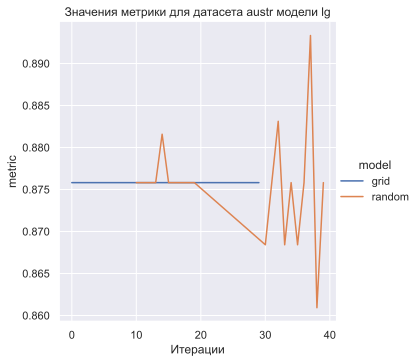

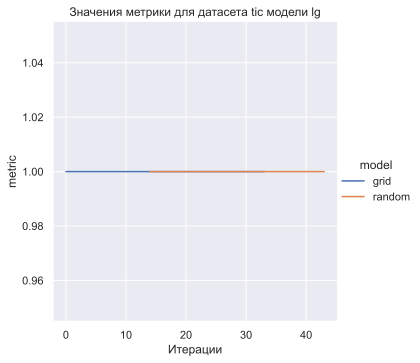

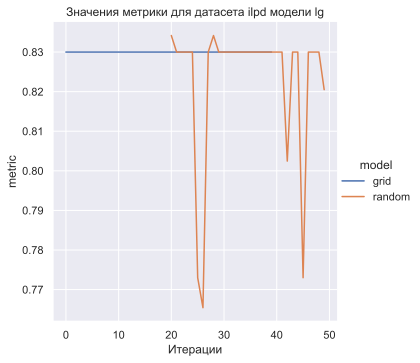

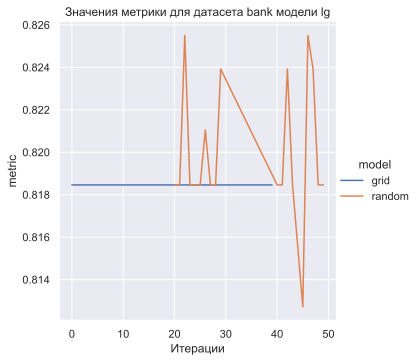

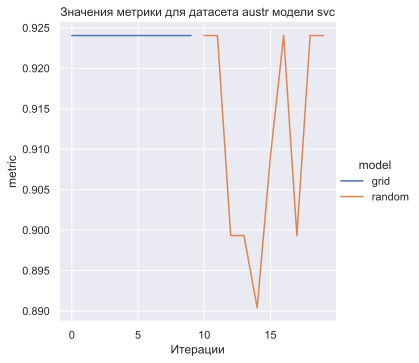

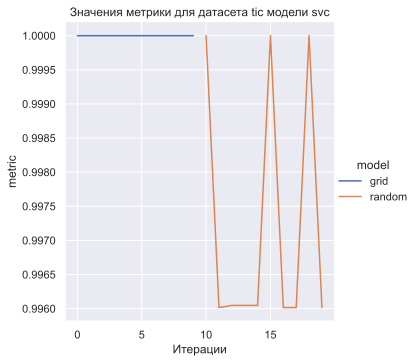

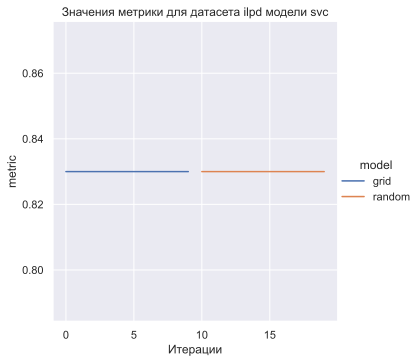

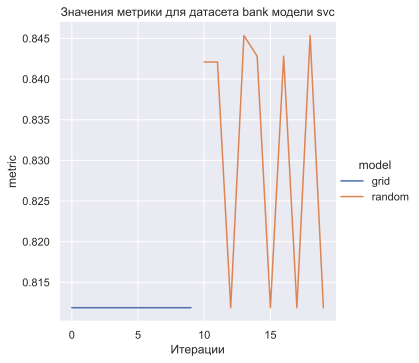

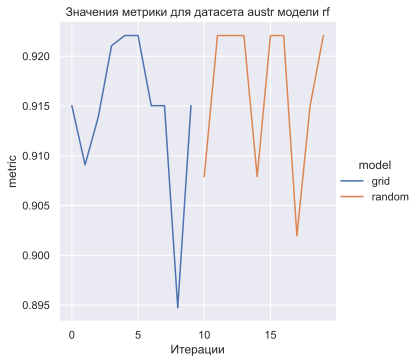

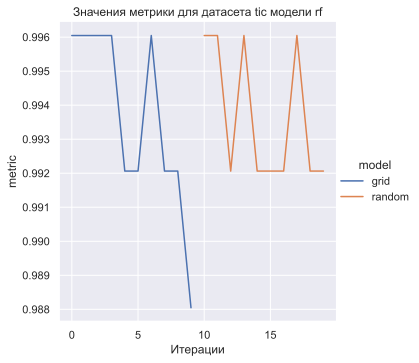

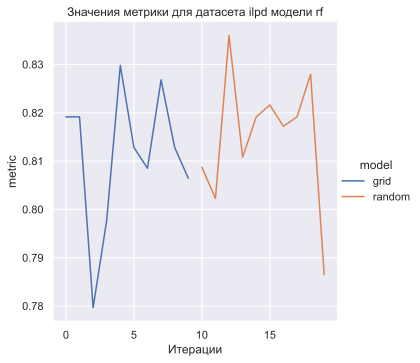

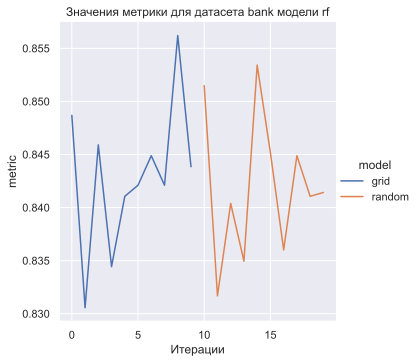

In [82]:
for search_model in ['rf', 'lg', 'svc']:
    for dataset in ['austr', 'tic', 'ilpd', 'bank']:
        data = df[(df['search_model'] == search_model) & (df['dataset'] == dataset)]
        data = data.reset_index(drop=True)
        sns.relplot(data=data, x=data.index, y='metric', hue='model', kind='line')
        plt.title('Значения метрики для датасета ' + dataset + ' модели ' + search_model)
        plt.xlabel('Итерации')
        plt.show()

Посчитаем среднее значение метрики для каждого датасета

In [98]:
mean_metric = df.groupby([df['dataset'], df['search_model'], df['model']])['metric'].mean().reset_index(name='value')

In [99]:
mean_metric

,dataset,search_model,model,value
0,austr,lg,grid,0.875817
1,austr,lg,random,0.875492
2,austr,rf,grid,0.914307
3,austr,rf,random,0.916525
4,austr,svc,grid,0.924051
5,austr,svc,random,0.911774
6,bank,lg,grid,0.818462
7,bank,lg,random,0.819684
8,bank,rf,grid,0.842981
9,bank,rf,random,0.842047


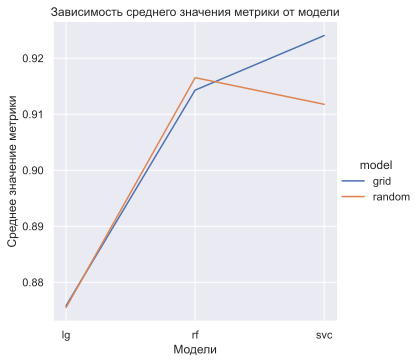

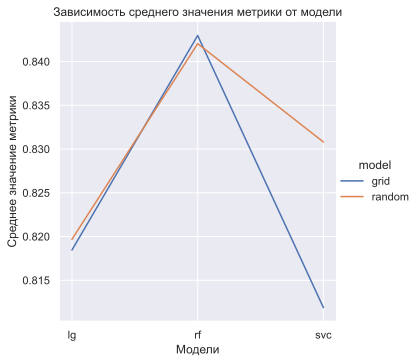

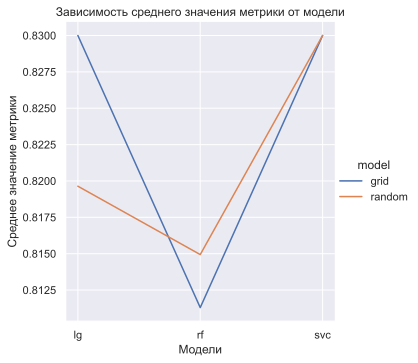

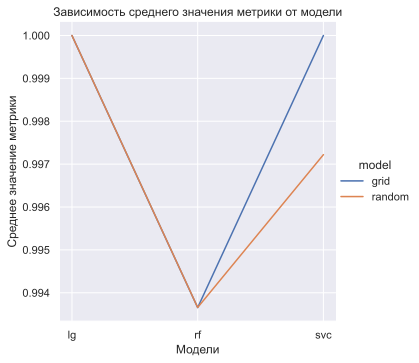

In [102]:
for dataset in ['austr', 'bank', 'ilpd', 'tic']:
    data = mean_metric[mean_metric['dataset'] == dataset]
    sns.relplot(data=data, y='value', x='search_model', hue='model', kind='line')
    plt.xlabel('Модели')
    plt.ylabel('Среднее значение метрики')
    plt.title('Зависимость среднего значения метрики от модели')
    plt.show()

Посчитаем стандартное отклонение для каждого датасета:

In [107]:
std_metric = df.groupby([df['dataset'], df['search_model'], df['model']])['metric'].std().reset_index(name='value')

In [108]:
std_metric

,dataset,search_model,model,value
0,austr,lg,grid,0.000000
1,austr,lg,random,0.006395
2,austr,rf,grid,0.008019
3,austr,rf,random,0.007805
4,austr,svc,grid,0.000000
5,austr,svc,random,0.013670
6,bank,lg,grid,0.000000
7,bank,lg,random,0.003297
8,bank,rf,grid,0.007093
9,bank,rf,random,0.006948


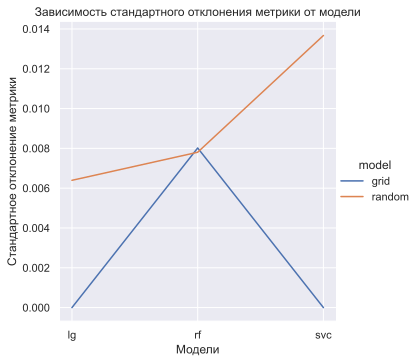

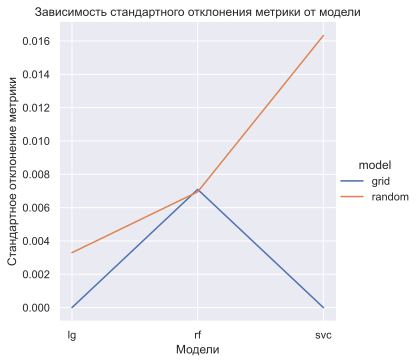

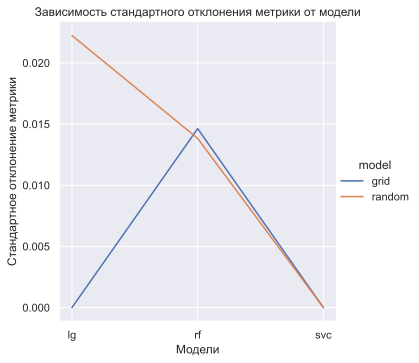

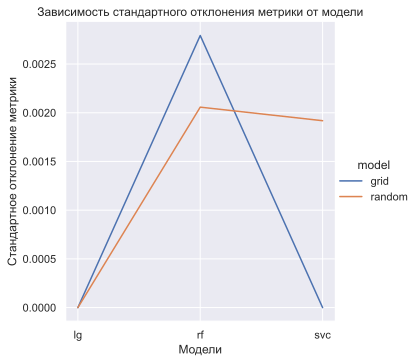

In [110]:
for dataset in ['austr', 'bank', 'ilpd', 'tic']:
    data = std_metric[std_metric['dataset'] == dataset]
    sns.relplot(data=data, y='value', x='search_model', hue='model', kind='line')
    plt.xlabel('Модели')
    plt.ylabel('Стандартное отклонение метрики')
    plt.title('Зависимость стандартного отклонения метрики от модели')
    plt.show()

Мини-вывод про GrindSearchCV и RandomSearchCV:

Из наблюдений RandomSearchCV работает ощутимо быстрее, т.к. он выбирает параметры случайным образом из возможного множества, а GrindSearchCV перебирает все возможные комбинации гиперпараметров по сетке, из-за чего работает сильно дольше